# Finding minima in data

A common problem is algorithmically finding the minima (or maxima) in some data. Often many other problems can be transformed into this problem, or the other way round, so I will collect here some methods I have found useful.

## Smaller than neigbours

A very simple, but elegant method, we take the 1d array of data and look for points that are smaller than either of their neigbours. I found this particular implementation by `Sven Marnach` [on StackOverflow](http://stackoverflow.com/questions/4624970/finding-local-maxima-minima-with-numpy-in-a-1d-numpy-array):

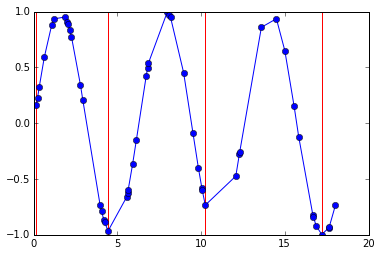

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def SmallerThanNeigbours(y):
    " Return a boolean array for the entries in x smaller than both neibours"
    return np.r_[True, y[1:] < y[:-1]] & np.r_[y[:-1] < y[1:], True]

# Setup some data
x = np.sort(np.random.uniform(0, 20, 50))
y = np.sin(x)

# Plot the minima
for root in x[SmallerThanNeigbours(y)]:
    plt.axvline(root, color="r")

plt.plot(x, y, "-o")
plt.show()

This works well in this instance, mostly because the data is smooth although it does mis-identify the initial value as a root. This could easily be fixed by comparing with the other roots. However, there is a more serious problem when the data is not smooth. In a more typical data set, we would expect the data to contain some noise. In such an instance we can see how the algroithm fails:

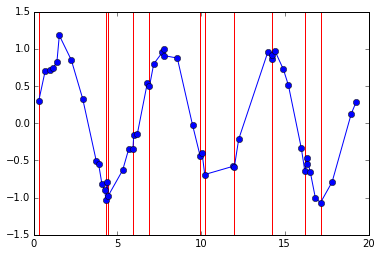

In [25]:
# Create data with some noise
x = np.sort(np.random.uniform(0, 20, 50))
y = np.sin(x) + np.random.normal(0, 0.1, 50)

# Plot the minima
for root in x[SmallerThanNeigbours(y)]:
    plt.axvline(root, color="r")

plt.plot(x, y, "-o")
plt.show()

Clearly this fails due to the introduction of noise. We could of course filter the data and I aim to look at this at some point.

## Clustering

A method which works well will noisy data is clustering. The idea is to use a threshold to pick all the points
that are *near* to the roots, then cluster these into a single value. With `1D` data sets this is relatively easy using the `scipy.cluster` routines like this:

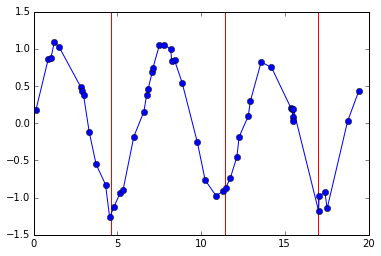

In [31]:
from scipy.cluster.vq import kmeans

# Create data with some noise
x = np.sort(np.random.uniform(0, 20, 50))
y = np.sin(x) + np.random.normal(0, 0.1, 50)

miny = np.min(y) + 0.1 * (np.max(y) - np.min(y))
roots , _ = kmeans(x[y < toly], 3)
for root in roots:
    plt.axvline(root, color="r")
    
plt.plot(x, y, "-o")
plt.show()

The difficulty here is two-fold: first, we must specify the number of roots we expect which requires a visual inspection; second, some thought must be given to how to set `miny`. Here I have simple set it as the minimum plus 10% of the range. Other situations may require some tweaking.